In [2]:
import os
from pathlib import Path
import pandas as pd


CURRENT_DIR = os.path.abspath('')
DATA_DIR = Path(CURRENT_DIR).parent / "data"
FILE_PATH = DATA_DIR / "cleaned_dataset.csv"

df = pd.read_csv(FILE_PATH, index_col = 0)
#print(DATA_DIR)

In [ ]:
df.columns

Index(['sentiment', 'sentiment_score', 'hashtag', 'user_id', 'track_id',
       'artist_id', 'instrumentalness', 'liveness', 'speechiness',
       'danceability', 'valence', 'loudness', 'tempo', 'acousticness',
       'energy', 'mode', 'key', 'tz_Alaska_Time', 'tz_Central_Time',
       'tz_Eastern_Time', 'tz_Hawaii_Time', 'tz_Mountain_Time',
       'tz_Pacific_Time'],
      dtype='object')

In [ ]:
df.head()

sentiment  sentiment_score     hashtag    user_id   
0          1              2.4  greatmusic  252330820  \
1          1              2.4  greatmusic   29235188   
2          1              0.6  nowplaying   29235188   
3          1              1.0     classic   29235188   
7          1              0.3  amonamarth  124052165   

                           track_id                         artist_id   
0  8f2ac86abb8bd48273c8fc95b632e347  1a17d5f8af99355edd8a92679a02cb0d  \
1  45bbd6d7cd65dc77596af8c5c0b89a70  4a4e2ab094a4521b06252e9fdaf1fd0a   
2  45bbd6d7cd65dc77596af8c5c0b89a70  4a4e2ab094a4521b06252e9fdaf1fd0a   
3  45bbd6d7cd65dc77596af8c5c0b89a70  4a4e2ab094a4521b06252e9fdaf1fd0a   
7  d53b2de022666067050dae8f6645edc2  942c9f2520684c22eb6216a92b711f9e   

   instrumentalness  liveness  speechiness  danceability  ...  acousticness   
0          0.000000    0.1980       0.1690         0.461  ...      0.100000  \
1          0.000010    0.0454       0.0451         0.677  ...      0.031300   
2          0.000010    0.0454       0.0451         0.677  ...      0.031300   
3          0.000010    0.0454       0.0451         0.677  ...      0.031300   
7          0.000142    0.1130       0.0709         0.355  ...      0.000004   

   energy  mode   key  tz_Alaska_Time  tz_Central_Time  tz_Eastern_Time   
0   0.628     0   4.0               0                0                1  \
1   0.544     0  11.0               0                0                1   
2   0.544     0  11.0               0                0                1   
3   0.544     0  11.0               0                0                1   
7   0.980     0   7.0               1                0                0   

   tz_Hawaii_Time  tz_Mountain_Time  tz_Pacific_Time  
0               0                 0                0  
1               0                 0                0  
2               0                 0                0  
3               0                 0                0  
7               0                 0                0  

[5 rows x 23 columns]

In [ ]:
df.shape

(2267492, 23)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()
sns.set_style('whitegrid')


sentiment_score
0.6    97.737015
1.0     1.061966
0.9     0.450762
0.0     0.313209
1.3     0.203441
0.7     0.071092
0.4     0.039868
1.6     0.031577
0.8     0.020110
0.3     0.018082
2.1     0.016891
2.4     0.011555
1.8     0.008820
0.2     0.006439
1.4     0.003043
0.6     0.001852
1.1     0.000794
1.2     0.000794
0.5     0.000441
0.1     0.000353
1.2     0.000309
2.7     0.000265
1.5     0.000265
0.9     0.000221
1.7     0.000132
2.4     0.000088
1.3     0.000088
3.0     0.000088
2.6     0.000088
1.5     0.000044
3.4     0.000044
3.2     0.000044
1.9     0.000044
2.6     0.000044
0.9     0.000044
2.9     0.000044
1.8     0.000044
Name: proportion, dtype: float64

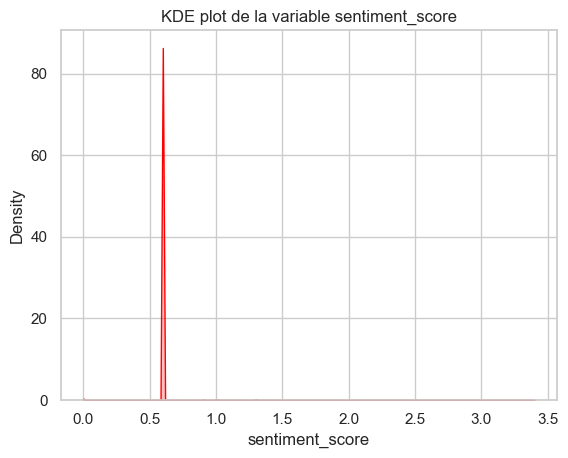

In [ ]:
df['sentiment_score'].value_counts(normalize=True)*100

C:\Users\benoit\AppData\Local\Temp\ipykernel_17028\802956349.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(211)


Text(0.5, 1.0, 'Boxplot de la variable sentiment_score')

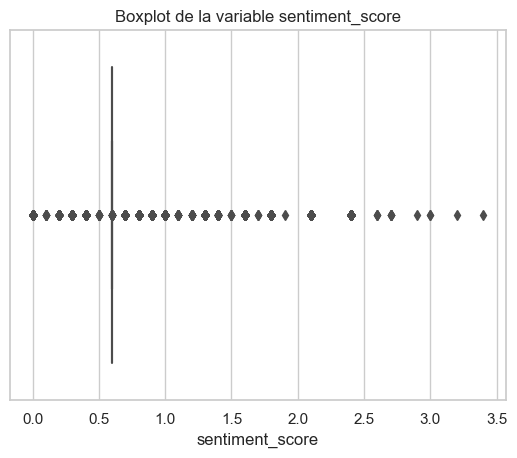

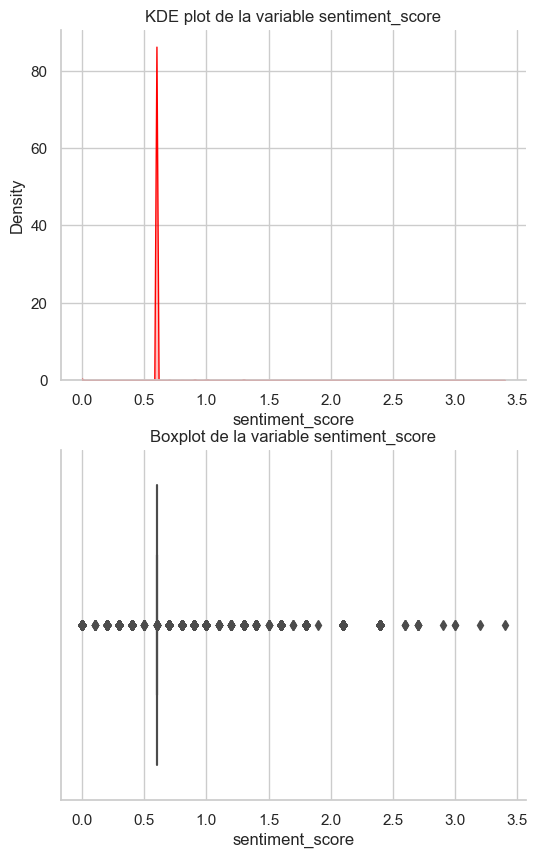

In [ ]:
fig = plt.subplots(figsize=(6, 10))

ax1 = plt.subplot(211)
sns.kdeplot(x='sentiment_score', fill=True, cut=0, color='red', data=df, ax=ax1);
sns.despine()
plt.title("KDE plot de la variable sentiment_score")

ax2 = plt.subplot(212)
sns.boxplot(x='sentiment_score', data=df, ax=ax2);
sns.despine()
plt.title("Boxplot de la variable sentiment_score")



C:\Users\benoit\AppData\Local\Temp\ipykernel_17028\2813475161.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(211)


Text(0.5, 1.0, 'Boxplot de la variable valence')

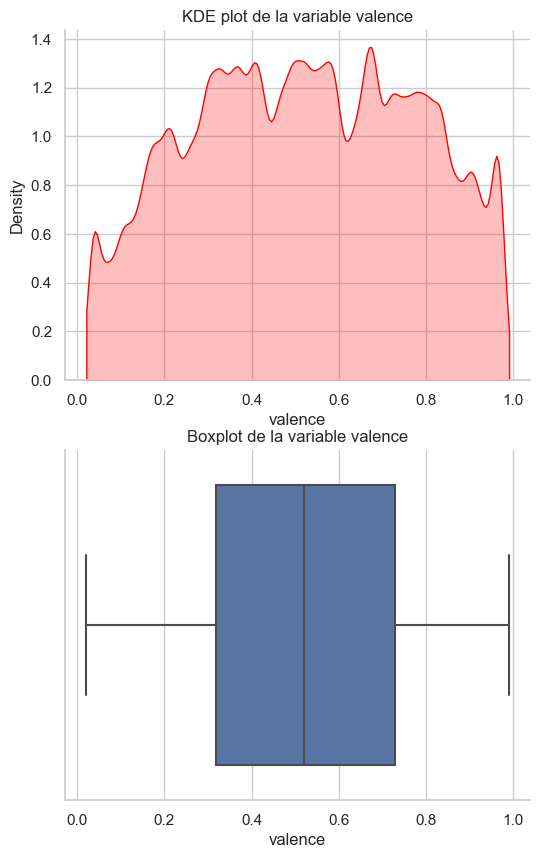

In [ ]:
fig = plt.subplots(figsize=(6, 10))

ax1 = plt.subplot(211)
sns.kdeplot(x='valence', fill=True, cut=0, color='red', data=df, ax=ax1);
sns.despine()
plt.title("KDE plot de la variable valence")


ax2 = plt.subplot(212)
sns.boxplot(x='valence', data=df, ax=ax2);
sns.despine()
plt.title("Boxplot de la variable valence")


Text(0.5, 1.0, 'Boxplot des variables quantitatives normalisées (min-max)')

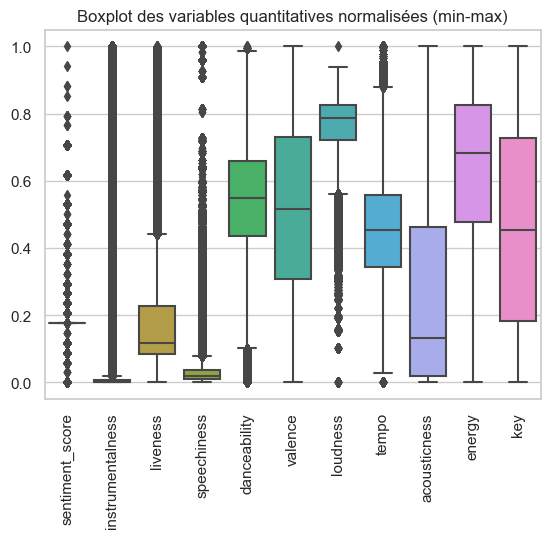

In [4]:
df_quantitative = df.drop(['user_id','track_id', 'hashtag','artist_id', 'sentiment','mode','tz_Alaska_Time','tz_Central_Time','tz_Eastern_Time',
                          'tz_Hawaii_Time','tz_Mountain_Time','tz_Pacific_Time'], axis=1)

X = df_quantitative
X_norm = (X - X.min(axis = 0)) / (X.max(axis = 0) - X.min(axis = 0))
ax = sns.boxplot(data=X_norm);
ax.set_xticklabels(labels=X_norm.columns, rotation=90);
plt.title("Boxplot des variables quantitatives normalisées (min-max)")




Text(0.5, 0.98, 'Histogramme de distribution des variables quantitatives')

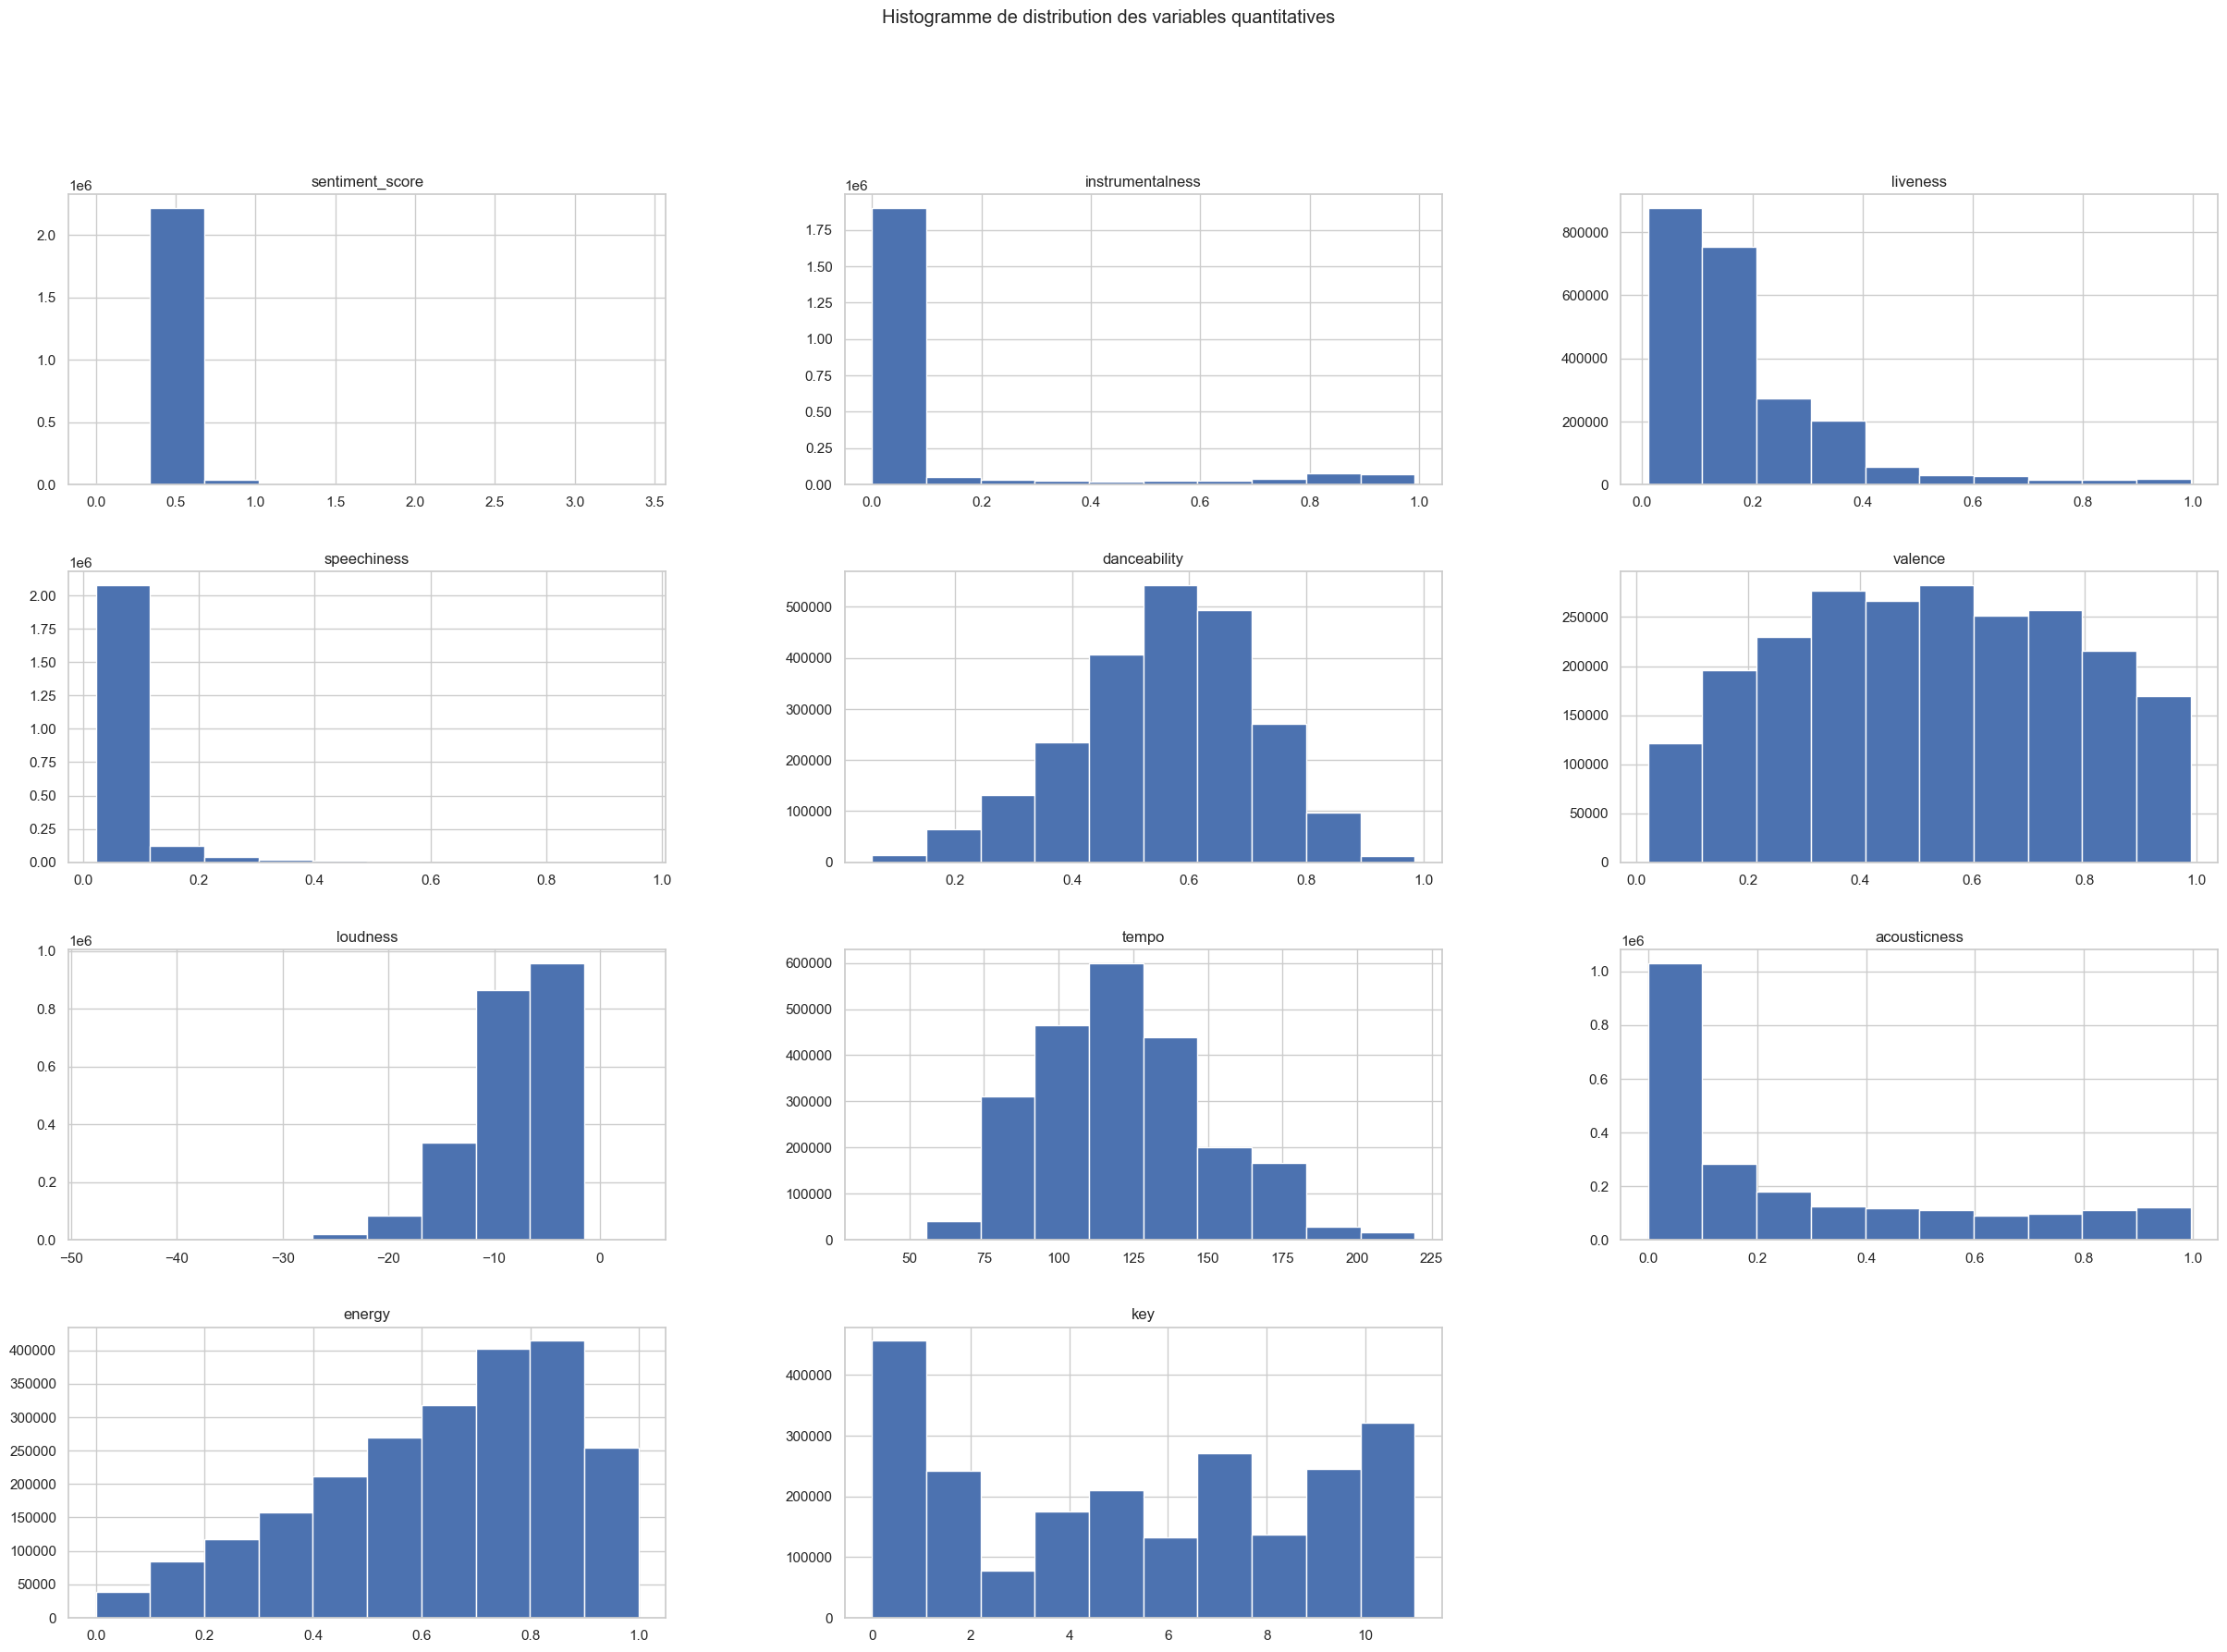

In [5]:
df_quantitative = df.drop(['user_id','track_id', 'hashtag','artist_id', 'sentiment','mode','tz_Alaska_Time','tz_Central_Time','tz_Eastern_Time',
                          'tz_Hawaii_Time','tz_Mountain_Time','tz_Pacific_Time'], axis=1)
#df_quantitative.hist(figsize=(30,20));

import pylab as pl

data= df_quantitative
axes = data.hist(figsize=(30,20))
pl.suptitle("Histogramme de distribution des variables quantitatives")

d:\travail\dev\projects\dst_reco_music\env\lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'ci'
  cset = contour_func(
d:\travail\dev\projects\dst_reco_music\env\lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'ci'
  cset = contour_func(
d:\travail\dev\projects\dst_reco_music\env\lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'ci'
  cset = contour_func(
d:\travail\dev\projects\dst_reco_music\env\lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'ci'
  cset = contour_func(
d:\travail\dev\projects\dst_reco_music\env\lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'ci'
  cset = contour_func(
d:\travail\dev\projects\dst_reco_music\env\lib\site-packages\seaborn\distributions.py:1185: UserWarn

Text(0.5, 1.01, "Pairplot: corrélations et distribution d'un échantillon de 1000 variables quantitatives")

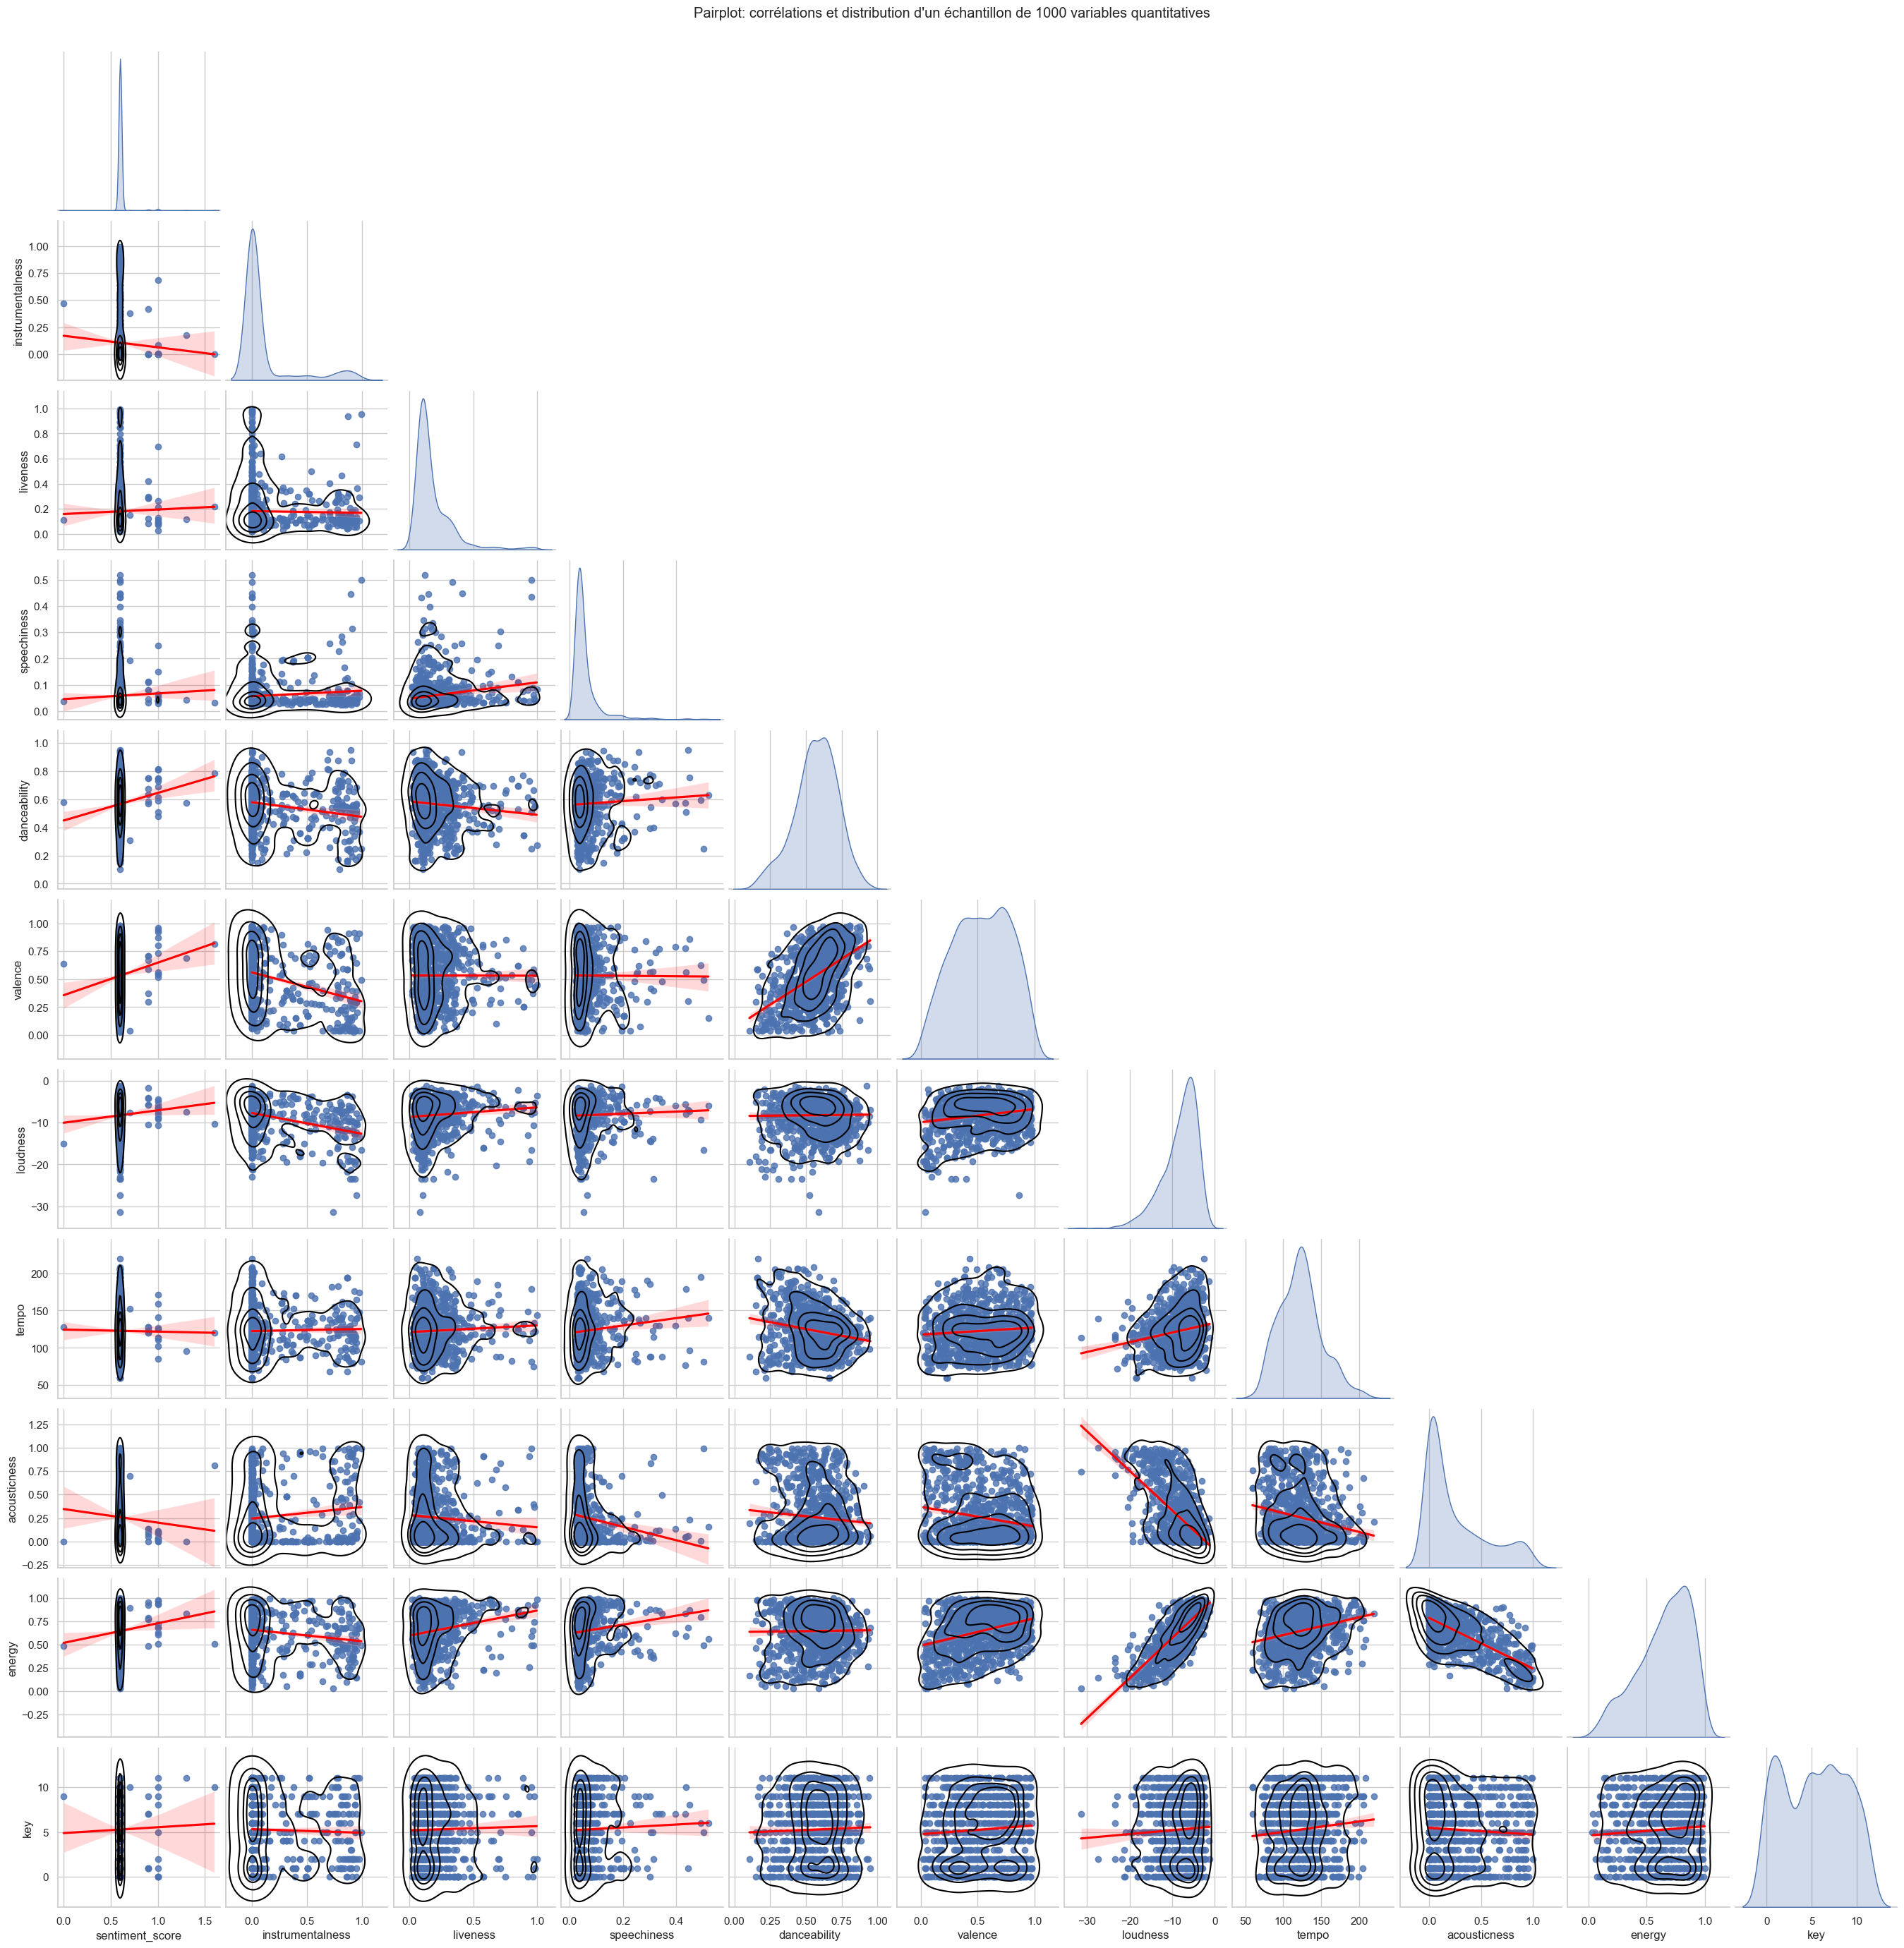

In [309]:
g = sns.pairplot(df_quantitative.sample(1000), diag_kind='kde', kind='reg', corner=True, plot_kws={'line_kws':{'color': 'red'}});
g.map_offdiag(sns.kdeplot, levels=5, color='black')
g.fig.suptitle("Pairplot: corrélations et distribution d'un échantillon de 1000 variables quantitatives", y=1.01)


Text(0.5, 1.0, 'Heatmap des corrélations de Pearson entre variables quantitatives')

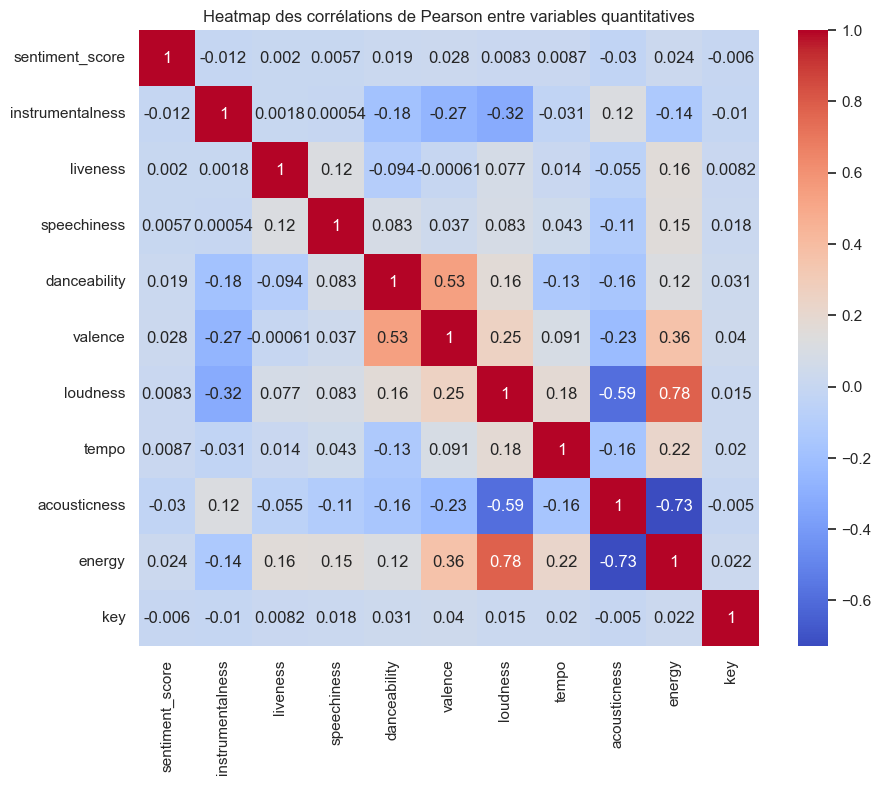

In [ ]:
cor = df_quantitative.corr(method='pearson')
fig = plt.subplots(figsize = (10, 8))
ax1 = plt.subplot(111)
sns.heatmap(cor, annot=True, cmap='coolwarm',ax=ax1);
plt.title('Heatmap des corrélations de Pearson entre variables quantitatives')





Text(0.5, 1.01, "Corrélations et distribution de variables quantitatives ciblées sur l'ensemble du dataset")

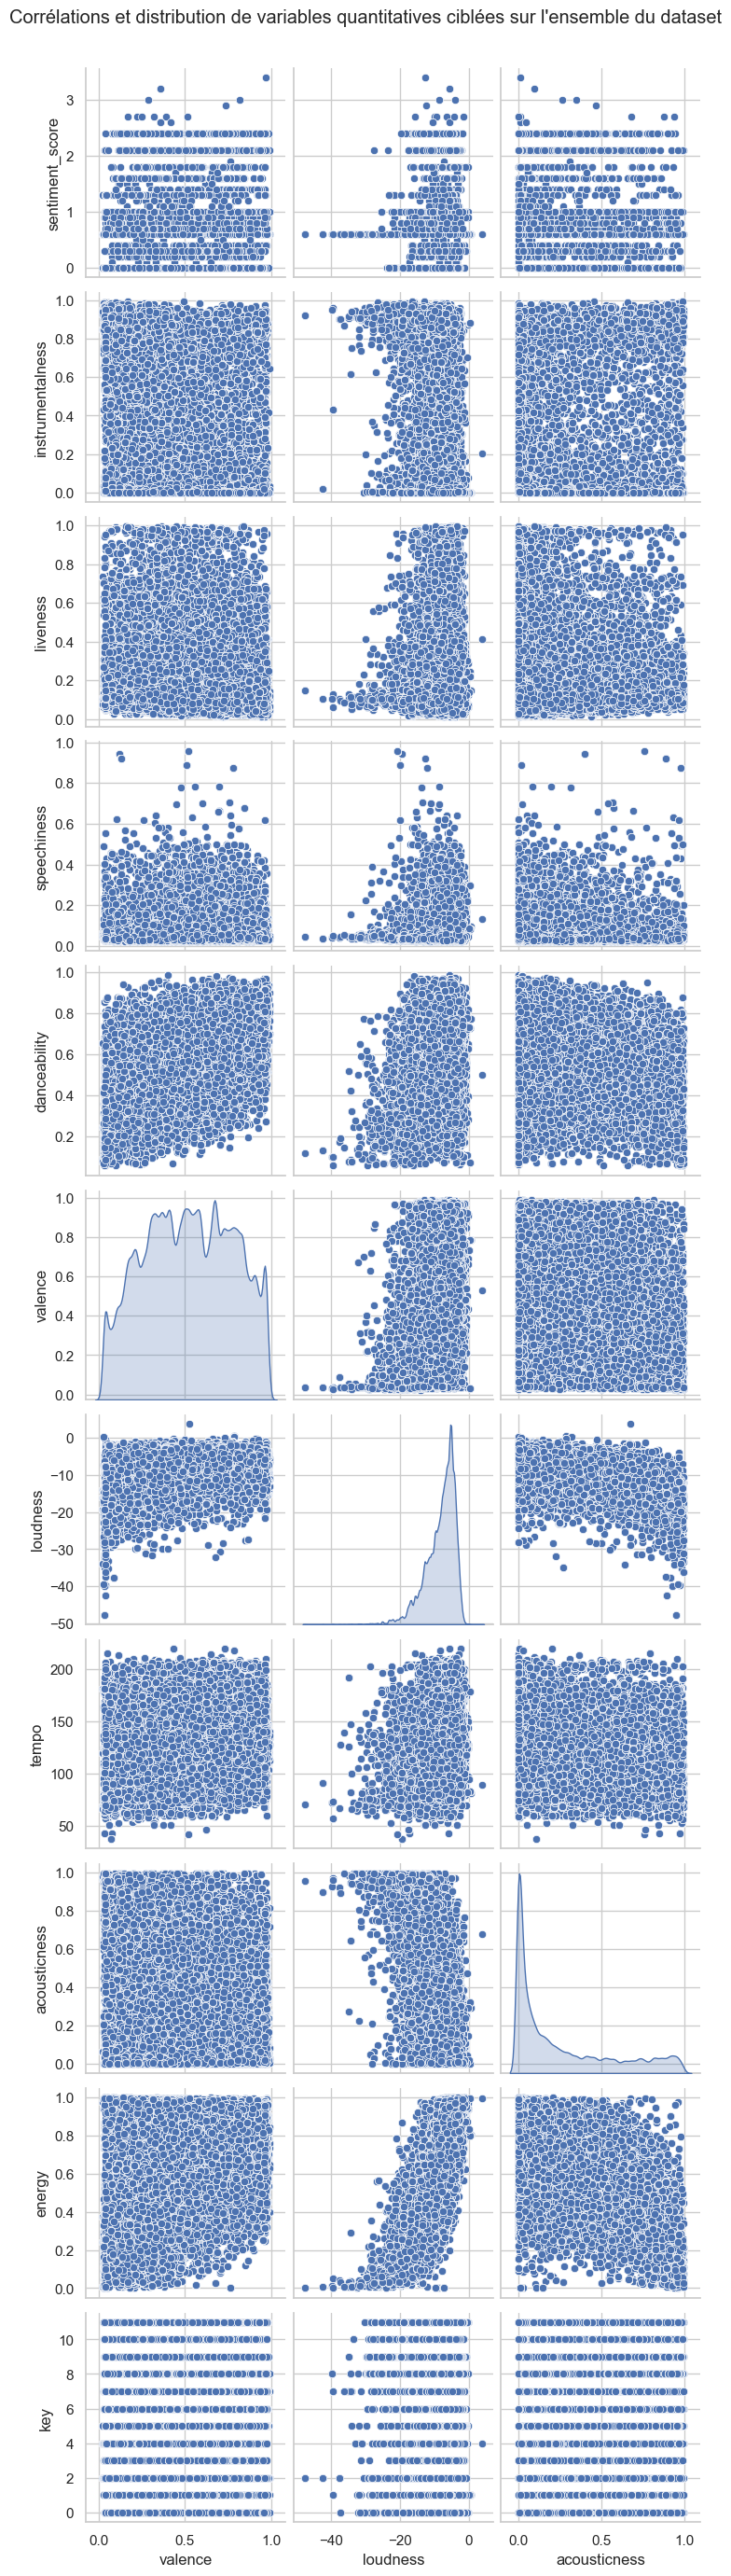

In [6]:
f = sns.pairplot(x_vars=['valence', 'loudness', 'acousticness'],
                 y_vars=['sentiment_score', 'instrumentalness', 'liveness', 'speechiness',
                         'danceability','valence', 'loudness', 'tempo', 'acousticness', 'energy', 'key'],
                 diag_kind = 'kde', data=df_quantitative);  

#f.map_diag(sns.kdeplot)
#f.map_offdiag(sns.regplot, ci=None, truncate=True, scatter_kws={'s': 1}, line_kws={'lw': 2, 'color': 'red'})  #scatter_kws={'s': 1, 'alpha': 0.5} truncate=True,

f.fig.suptitle("Corrélations et distribution de variables quantitatives ciblées sur l'ensemble du dataset", y=1.01)

In [ ]:
df['track_id'].nunique()

28872

In [ ]:
df['track_id'].unique()

array(['8f2ac86abb8bd48273c8fc95b632e347',
       '45bbd6d7cd65dc77596af8c5c0b89a70',
       'd53b2de022666067050dae8f6645edc2', ...,
       '960f037c161aa000cf5df179d1bf4c3c',
       '33c90e87f7256db3fb776e2133c30309',
       '7e10d6e830aedad915e0234a1d2eb12d'], dtype=object)

In [ ]:
df['artist_id'].nunique

7265

In [ ]:
df['artist_id'].unique()

array(['1a17d5f8af99355edd8a92679a02cb0d',
       '4a4e2ab094a4521b06252e9fdaf1fd0a',
       '942c9f2520684c22eb6216a92b711f9e', ...,
       '3efce83bba6e572dbe5c29d3c49c86ec',
       '2943e5f2e2844ff6f9ebd63a7d84f5ca',
       '19ff01effed638a7b69b79268561d68c'], dtype=object)

In [ ]:
print(df['track_id'].duplicated())

0          False
1          False
2           True
3           True
7          False
           ...  
3094566     True
3094567     True
3094589     True
3094590     True
3094591     True
Name: track_id, Length: 2267492, dtype: bool


In [ ]:
df['track_id']

0          8f2ac86abb8bd48273c8fc95b632e347
1          45bbd6d7cd65dc77596af8c5c0b89a70
2          45bbd6d7cd65dc77596af8c5c0b89a70
3          45bbd6d7cd65dc77596af8c5c0b89a70
7          d53b2de022666067050dae8f6645edc2
                         ...               
3094566    8b9f0e3f97cef746fc1e1c7e7a8bb533
3094567    9ffd87bbf725dac00f9e27fe637fb75b
3094589    6037484d261ee9a8b4bb5d4b966f3844
3094590    007473293651cf358edadae0c7baa85f
3094591    fe5448f1e597ae4665992ac892add339
Name: track_id, Length: 2267492, dtype: object

In [ ]:
print(len(df['track_id'][0]))

32


In [ ]:
## track_id comes from MusicBrainz track_ID reference with a lenght of 32 
## but is ill-defined: lacks "-" separators to reach 36

In [6]:
df

sentiment  sentiment_score       hashtag    user_id   
0                1              2.4    greatmusic  252330820  \
1                1              2.4    greatmusic   29235188   
2                1              0.6    nowplaying   29235188   
3                1              1.0       classic   29235188   
7                1              0.3    amonamarth  124052165   
...            ...              ...           ...        ...   
3094566          1              0.7  unitedwerock  169980427   
3094567          1              1.0      worktime  239449261   
3094589          1              0.9          numb  364559651   
3094590          1              0.8      warpaint  150938854   
3094591          0              0.0       wildcub   23446895   

                                 track_id                         artist_id   
0        8f2ac86abb8bd48273c8fc95b632e347  1a17d5f8af99355edd8a92679a02cb0d  \
1        45bbd6d7cd65dc77596af8c5c0b89a70  4a4e2ab094a4521b06252e9fdaf1fd0a   
2        45bbd6d7cd65dc77596af8c5c0b89a70  4a4e2ab094a4521b06252e9fdaf1fd0a   
3        45bbd6d7cd65dc77596af8c5c0b89a70  4a4e2ab094a4521b06252e9fdaf1fd0a   
7        d53b2de022666067050dae8f6645edc2  942c9f2520684c22eb6216a92b711f9e   
...                                   ...                               ...   
3094566  8b9f0e3f97cef746fc1e1c7e7a8bb533  249229ca88aa4a8815315bb085cf4d61   
3094567  9ffd87bbf725dac00f9e27fe637fb75b  8a61fdba146a91689c3ce58f18817176   
3094589  6037484d261ee9a8b4bb5d4b966f3844  edefbe931fbf98c711ca6893bb175683   
3094590  007473293651cf358edadae0c7baa85f  bdcb03e6f6d6cf75da11799b95a113cc   
3094591  fe5448f1e597ae4665992ac892add339  9be2c6473383146530cbebd839cb5fd0   

         instrumentalness  liveness  speechiness  danceability  ...   
0                0.000000    0.1980       0.1690         0.461  ...  \
1                0.000010    0.0454       0.0451         0.677  ...   
2                0.000010    0.0454       0.0451         0.677  ...   
3                0.000010    0.0454       0.0451         0.677  ...   
7                0.000142    0.1130       0.0709         0.355  ...   
...                   ...       ...          ...           ...  ...   
3094566          0.002500    0.0266       0.1040         0.572  ...   
3094567          0.003180    0.2340       0.0557         0.663  ...   
3094589          0.000302    0.1140       0.0273         0.546  ...   
3094590          0.223000    0.1030       0.0287         0.540  ...   
3094591          0.004150    0.1120       0.0805         0.533  ...   

         acousticness  energy  mode   key  tz_Alaska_Time  tz_Central_Time   
0            0.100000   0.628     0   4.0               0                0  \
1            0.031300   0.544     0  11.0               0                0   
2            0.031300   0.544     0  11.0               0                0   
3            0.031300   0.544     0  11.0               0                0   
7            0.000004   0.980     0   7.0               1                0   
...               ...     ...   ...   ...             ...              ...   
3094566      0.002280   0.990     1   2.0               0                0   
3094567      0.004130   0.822     1   9.0               0                0   
3094589      0.620000   0.404     0   9.0               1                0   
3094590      0.092100   0.816     0  11.0               0                0   
3094591      0.010300   0.909     1   2.0               0                0   

         tz_Eastern_Time  tz_Hawaii_Time  tz_Mountain_Time  tz_Pacific_Time  
0                      1               0                 0                0  
1                      1               0                 0                0  
2                      1               0                 0                0  
3                      1               0                 0                0  
7                      0               0                 0                0  
...                  ...         

In [7]:
sample_size = 30
filtre_popularity = df['track_id'].value_counts().head(sample_size).index
#print(filtre_popularity)
df_popularity = df[df['track_id'].isin(filtre_popularity)]
print(df['track_id'].value_counts()[:30].sum())
df_popularity = df_popularity.groupby('track_id')\
                             .agg({'valence': 'mean', 'sentiment_score' : 'mean', 'track_id' : 'count', 'user_id' : 'count'})\
                             .rename(columns={'valence': 'valence_avg', 'sentiment_score': 'sentiment_score_avg', 'track_id' : 'track_id_count', 'user_id' : 'user_id_count'})\
                             .sort_values(by='track_id_count', ascending=False)\
                             .reset_index()

df_popularity
#df_test = df_popularity[df_popularity['track_id']=='7188f922ba73eb2509c02d15ec62ff0e']
#df_test
df_popularity['track_id'].duplicated().sum()

80201


0

In [8]:

df_valence = df.groupby('track_id')\
                    .agg({'valence' : 'mean', 'sentiment_score' : 'mean', 'track_id' : 'count', 'user_id' : 'count'})\
                    .rename(columns={'valence': 'valence_avg', 'sentiment_score': 'sentiment_score_avg', 'track_id' :'track_id_count', 'user_id' : 'user_id_count'})\
                    .sort_values(by=['valence_avg', 'sentiment_score_avg'], ascending=False)
                    

df_valence = df_valence[df_valence['track_id_count']>=100].reset_index().head(sample_size)
#df_valence


df_sentiment = df.groupby('track_id')\
                    .agg({'valence' : 'mean', 'sentiment_score' : 'mean', 'track_id' : 'count', 'user_id' : 'count'})\
                    .rename(columns={'valence': 'valence_avg', 'sentiment_score': 'sentiment_score_avg', 'track_id' :'track_id_count','user_id' : 'user_id_count'})\
                    .sort_values(by=['sentiment_score_avg', 'valence_avg'], ascending=False)
                    

df_sentiment = df_sentiment[df_sentiment['track_id_count']>=100].reset_index().head(sample_size)
df_sentiment = df_sentiment.reset_index().head(sample_size)
#df_sentiment
df_test = df_sentiment[df_sentiment['track_id']=='a070490855f45d0ac96a9f74e0c605c4']

df_test = df[df['track_id']=='a070490855f45d0ac96a9f74e0c605c4']
df_test



sentiment  sentiment_score     hashtag    user_id   
15226            1              0.6  nowplaying  290563676  \
15227            1              1.6       joy97  290563676   
79133            1              0.6  nowplaying  290563676   
79134            1              1.6       joy97  290563676   
126826           1              0.6  nowplaying  290563676   
...            ...              ...         ...        ...   
2862847          1              1.6       joy97  290563676   
2930424          1              0.6  nowplaying  290563676   
2930425          1              1.6       joy97  290563676   
2930459          1              0.6  nowplaying  290563676   
2930460          1              1.6       joy97  290563676   

                                 track_id                         artist_id   
15226    a070490855f45d0ac96a9f74e0c605c4  98d7f9d0a71adddb7345a0f871e89ad2  \
15227    a070490855f45d0ac96a9f74e0c605c4  98d7f9d0a71adddb7345a0f871e89ad2   
79133    a070490855f45d0ac96a9f74e0c605c4  98d7f9d0a71adddb7345a0f871e89ad2   
79134    a070490855f45d0ac96a9f74e0c605c4  98d7f9d0a71adddb7345a0f871e89ad2   
126826   a070490855f45d0ac96a9f74e0c605c4  98d7f9d0a71adddb7345a0f871e89ad2   
...                                   ...                               ...   
2862847  a070490855f45d0ac96a9f74e0c605c4  98d7f9d0a71adddb7345a0f871e89ad2   
2930424  a070490855f45d0ac96a9f74e0c605c4  98d7f9d0a71adddb7345a0f871e89ad2   
2930425  a070490855f45d0ac96a9f74e0c605c4  98d7f9d0a71adddb7345a0f871e89ad2   
2930459  a070490855f45d0ac96a9f74e0c605c4  98d7f9d0a71adddb7345a0f871e89ad2   
2930460  a070490855f45d0ac96a9f74e0c605c4  98d7f9d0a71adddb7345a0f871e89ad2   

         instrumentalness  liveness  speechiness  danceability  ...   
15226            0.000053     0.582        0.195         0.313  ...  \
15227            0.000053     0.582        0.195         0.313  ...   
79133            0.000053     0.582        0.195         0.313  ...   
79134            0.000053     0.582        0.195         0.313  ...   
126826           0.000053     0.582        0.195         0.313  ...   
...                   ...       ...          ...           ...  ...   
2862847          0.000053     0.582        0.195         0.313  ...   
2930424          0.000053     0.582        0.195         0.313  ...   
2930425          0.000053     0.582        0.195         0.313  ...   
2930459          0.000053     0.582        0.195         0.313  ...   
2930460          0.000053     0.582        0.195         0.313  ...   

         acousticness  energy  mode  key  tz_Alaska_Time  tz_Central_Time   
15226          0.0131   0.859     0  0.0               0                0  \
15227          0.0131   0.859     0  0.0               0                0   
79133          0.0131   0.859     0  0.0               0                0   
79134          0.0131   0.859     0  0.0               0                0   
126826         0.0131   0.859     0  0.0               0                0   
...               ...     ...   ...  ...             ...              ...   
2862847        0.0131   0.859     0  0.0               0                0   
2930424        0.0131   0.859     0  0.0               0                0   
2930425        0.0131   0.859     0  0.0               0                0   
2930459        0.0131   0.859     0  0.0               0                0   
2930460        0.0131   0.859     0  0.0               0                0   

         tz_Eastern_Time  tz_Hawaii_Time  tz_Mountain_Time  tz_Pacific_Time  
15226                  1               0                 0                0  
15227                  1               0                 0                0  
79133                  1               0                 0                0  
79134                  1               0                 0                0  
126826                 1               0                 0                0  
...                  ...             ...               ...           

C:\Users\benoit\AppData\Local\Temp\ipykernel_1908\2887014574.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(331)


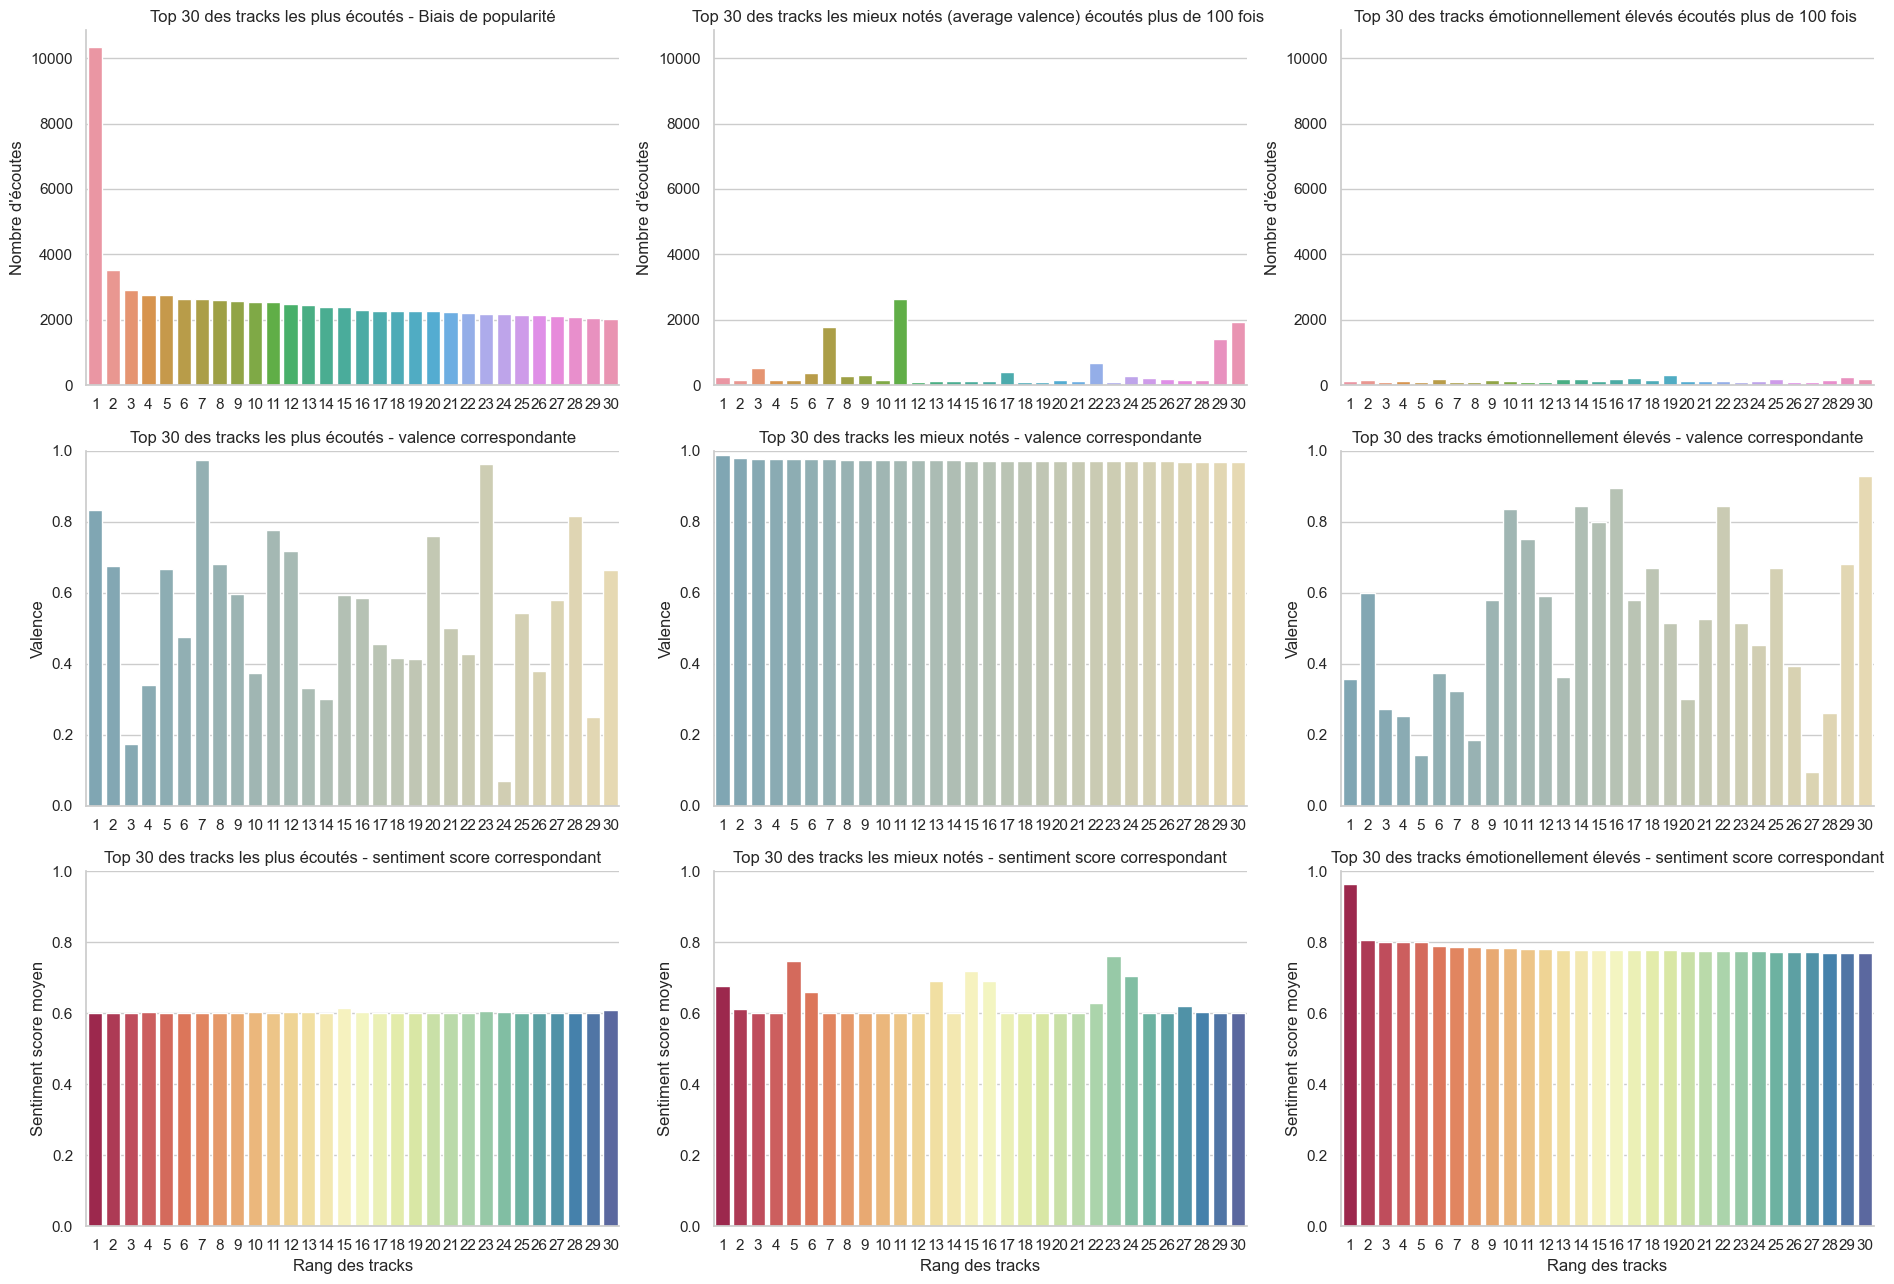

In [9]:
import numpy as np


fig = plt.subplots(figsize=(19, 13))

ax1 = plt.subplot(331)
sns.barplot(x=np.arange(1,sample_size+1),
            y=df_popularity['track_id_count'], width = 0.8, orient='v',  ax=ax1)

#ax1.set_xticklabels(labels=np.arange(1,sample_size+1), rotation=0);
#plt.xlabel('Rang des tracks')
sns.despine()
plt.ylabel("Nombre d'écoutes")
plt.title('Top 30 des tracks les plus écoutés - Biais de popularité')
plt.tight_layout()

ax2 = plt.subplot(332, sharey=ax1)
sns.barplot(x=np.arange(1,sample_size+1),
            y=df_valence['track_id_count'], width = 0.8, orient='v',  ax=ax2)
#plt.xlabel('Rang des tracks')
sns.despine()
plt.ylabel("Nombre d'écoutes")
plt.title('Top 30 des tracks les mieux notés (valence) écoutés plus de 100 fois ')
plt.tight_layout()

ax3 = plt.subplot(333, sharey=ax1)
sns.barplot(x=np.arange(1,sample_size+1),
            y=df_sentiment['track_id_count'], width = 0.8, orient='v',  ax=ax3)
#plt.xlabel('Rang des tracks')
sns.despine()
plt.ylabel("Nombre d'écoutes")
plt.title('Top 30 des tracks émotionnellement élevés écoutés plus de 100 fois ')
plt.tight_layout()

ax4 = plt.subplot(334)
sns.barplot(x=np.arange(1,sample_size+1),
            y=df_popularity['valence_avg'], width = 0.8, orient='v', palette = "blend:#7AB,#EDA", ax=ax4)
ax4.set_ylim(0,1)
#plt.xlabel('Rang des tracks')
sns.despine()
plt.ylabel("Valence")
plt.title('Top 30 des tracks les plus écoutés - valence correspondante')
plt.tight_layout()

ax5 = plt.subplot(335, sharey=ax4)
sns.barplot(x=np.arange(1,sample_size+1),
            y=df_valence['valence_avg'], width = 0.8, orient='v', palette = "blend:#7AB,#EDA", ax=ax5)
#plt.xlabel('Rang des tracks')
sns.despine()
plt.ylabel("Valence")
plt.title('Top 30 des tracks les mieux notés - valence correspondante')
plt.tight_layout()

ax6 = plt.subplot(336, sharey=ax4)
sns.barplot(x=np.arange(1,sample_size+1),
            y=df_sentiment['valence_avg'], width = 0.8, orient='v', palette = "blend:#7AB,#EDA", ax=ax6)
#plt.xlabel('Rang des tracks')
sns.despine()
plt.ylabel("Valence")
plt.title('Top 30 des tracks émotionnellement élevés - valence correspondante')
plt.tight_layout()

ax7 = plt.subplot(337)
sns.barplot(x=np.arange(1,sample_size+1),
            y=df_popularity['sentiment_score_avg'], width = 0.8, orient='v', palette = "Spectral", ax=ax7)
ax7.set_ylim(0,1)
sns.despine()
plt.xlabel('Rang des tracks')
plt.ylabel("Sentiment score moyen")
plt.title('Top 30 des tracks les plus écoutés - sentiment score correspondant')
plt.tight_layout()

ax8 = plt.subplot(338, sharey=ax7)
sns.barplot(x=np.arange(1,sample_size+1),
            y=df_valence['sentiment_score_avg'], width = 0.8, orient='v', palette = "Spectral", ax=ax8)
sns.despine()
plt.xlabel('Rang des tracks')
plt.ylabel("Sentiment score moyen")
plt.title('Top 30 des tracks les mieux notés - sentiment score correspondant')
plt.tight_layout()

ax9 = plt.subplot(339, sharey=ax7)
sns.despine()
sns.barplot(x=np.arange(1,sample_size+1),
            y=df_sentiment['sentiment_score_avg'], width = 0.8, orient='v', palette = "Spectral", ax=ax9)
plt.xlabel('Rang des tracks')
plt.ylabel("Sentiment score moyen")
plt.title('Top 30 des tracks émotionellement élevés - sentiment score correspondant')
plt.tight_layout()



In [19]:
from itertools import combinations

view_df = (df
 .groupby('track_id')['user_id']
 .agg(lambda x: list(combinations(sorted(set(x)), r=2)))
 .explode()
 .value_counts()
 #.head(100)
 )
view_df = view_df.to_frame().reset_index().rename(columns={'user_id': 'user_id_combination', 'count' :'shared_listenings'})
view_df['user_id_1'] = view_df['user_id_combination'].str[0]
view_df['user_id_2'] = view_df['user_id_combination'].str[1]
view_df


user_id_combination  shared_listenings  user_id_1   user_id_2
0        (320962743, 823876015)                947  320962743   823876015
1         (43391280, 823876015)                926   43391280   823876015
2        (492455721, 823876015)                924  492455721   823876015
3        (97675221, 2195263736)                876   97675221  2195263736
4         (43391280, 474276319)                859   43391280   474276319
...                         ...                ...        ...         ...
270386   (101526008, 124243431)                  1  101526008   124243431
270387   (101526008, 138665509)                  1  101526008   138665509
270388   (101526008, 150862398)                  1  101526008   150862398
270389   (101526008, 153333317)                  1  101526008   153333317
270390  (636238835, 2190897055)                  1  636238835  2190897055

[270391 rows x 4 columns]

5808

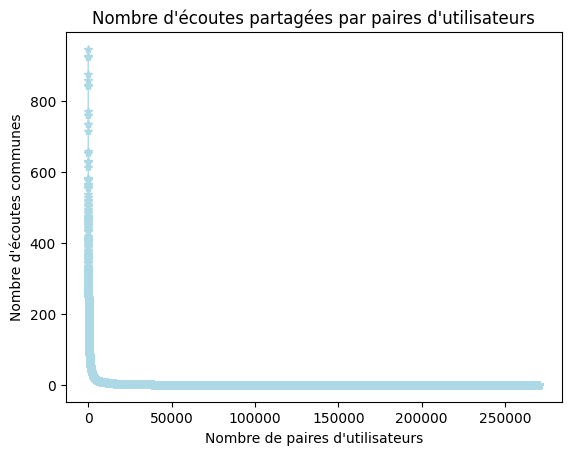

In [35]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, view_df.shape[0])
plt.plot(x, view_df['shared_listenings'], color='lightblue', linewidth=1, marker='*' )
plt.xlabel("Nombre de paires d'utilisateurs")
plt.ylabel("Nombre d'écoutes communes")
plt.title("Nombre d'écoutes partagées par paires d'utilisateurs")
df['user_id'].nunique()